In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
dtrain = pd.read_csv('aps_failure_train.csv')
dtrain.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,False,3256,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,320.0,14800.0,114044.0,64416.0,102.0,0.0,88808.0,0.0,0.0,0.0,0.0,0.0,182400.0,163802.0,27816.0,12172.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61388.0,...,NaN,NaN,276.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2255460.0,182.00,182.0,26270.0,21514.0,7660.0,3148.0,10264.0,121464.0,2944.0,158.0,260.0,0.0,0.0,0.0
1,False,3474,NaN,8.600000e+01,86.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,3360.0,165294.0,28272.0,0.0,0.0,102652.0,0.0,56.0,0.0,0.0,0.0,196058.0,182014.0,20716.0,10946.0,0.0,0.0,0.0,0.0,78.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,93644.0,...,0.0,165416.0,106.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1122.0,2226.0,426.0,0.0,0.0,5796.0,1202.0,9800.0,2672.0,0.0,0.0,0.0,0.0,2474220.0,NaN,NaN,15902.0,26396.0,23362.0,16746.0,31190.0,25052.0,18384.0,14814.0,24894.0,354.0,0.0,0.0
2,False,1332,NaN,2.400000e+01,14.0,0.0,0.0,0.0,0.0,0.0,25192.0,51490.0,17666.0,3654.0,0.0,0.0,0.0,37570.0,0.0,0.0,0.0,12546.0,17598.0,74830.0,74084.0,31356.0,4420.0,0.0,0.0,0.0,0.0,94.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,370.0,...,0.0,73172.0,242.0,262.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,1148.0,170.0,32.0,6578.0,2232.0,1798.0,258.0,3140.0,350.0,2.0,56.0,0.0,0.0,0.0,137.32,164.0,28390.0,9900.0,6520.0,3906.0,12168.0,18422.0,12824.0,5856.0,16.0,0.0,0.0,0.0
3,False,519842,NaN,2.130706e+09,1154.0,0.0,0.0,0.0,0.0,0.0,0.0,8430.0,7424.0,11730124.0,10241340.0,1080276.0,32396.0,20277900.0,36756.0,0.0,0.0,0.0,0.0,36300044.0,30541976.0,8792568.0,4611126.0,0.0,0.0,2044.0,0.0,330.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,39034.0,...,0.0,15456814.0,4816.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,386104.0,21880.0,8806.0,0.0,0.0,112888.0,24456.0,11009880.0,1209780.0,0.0,0.0,0.0,0.0,0.0,12630.02,12746.0,5591200.0,4549872.0,2847726.0,1440870.0,3660212.0,3233942.0,1023828.0,455646.0,278716.0,17978.0,0.0,0.0
4,False,712,8.0,3.800000e+01,28.0,0.0,0.0,0.0,0.0,0.0,6654.0,22806.0,57796.0,87004.0,2616.0,0.0,0.0,83020.0,0.0,0.0,0.0,4946.0,8128.0,245656.0,224276.0,132000.0,11622.0,4.0,0.0,0.0,0.0,130.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,53642.0,330.0,228.0,0.0,0.0,380.0,156830.0,0.0,0.0,0.0,0.0,2028.0,146.0,26.0,0.0,0.0,2360.0,490.0,1800.0,182.0,0.0,0.0,0.0,0.0,0.0,514.52,418.0,128718.0,16464.0,8214.0,3580.0,6408.0,6366.0,3790.0,3336.0,0.0,0.0,0.0,0.0


In [0]:
dtrain = pd.read_csv('aps_failure_train.csv')
dtest = pd.read_csv('aps_failure_test.csv')

In [0]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median').fit(dtrain)
train_median = pd.DataFrame(imp_median.transform(dtrain), columns=dtrain.columns)
test_median = pd.DataFrame(imp_median.transform(dtest), columns=dtest.columns)



In [0]:
################################################################################
y_train = train_median['class'].copy(deep=True)
X_train = train_median.copy(deep=True)
X_train.drop(['class'], inplace=True, axis=1)

#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=0)
#X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

#####

y_test = test_median['class'].copy(deep=True)
X_test = test_median.copy(deep=True)
X_test.drop(['class'], inplace=True, axis=1)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0.0, 55968), (1.0, 55968)]


In [0]:
class_labels_train2 = []

l = len(y_resampled)

for k in range(l):
    if y_resampled[k] == True:
        class_labels_train2.append(1)
        
    else:
        class_labels_train2.append(0)   
      
      #iloc

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, class_labels_train2, test_size=0.25, random_state=1)


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)


In [0]:
import xgboost as xgb

regressor=xgb.XGBClassifier(random_state=40)
regressor.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=40,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred4 = regressor.predict(X_val)

Mean Absolute Error: 0.025943396226415096
Mean Squared Error: 0.025943396226415096
Root Mean Squared Error: 0.16106953848079125
Confusion matrix:
 [[13645   430]
 [  296 13613]]


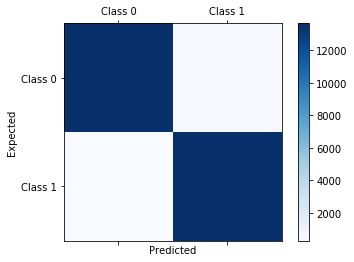

In [0]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred4.round())
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


#cost_matrix = conf_mat[0,1]*100+conf_mat[1,0]*3500
#cost_matrix

In [0]:
y_pred44 = regressor.predict(X_test)

In [0]:
ll = len(y_pred44)
class_labels_train22 = []


for x in range(ll):
    if y_pred44[x] == 0:
        class_labels_train22.append('false')
        
    else:
        class_labels_train22.append('true') 

In [0]:
a = np.asarray(class_labels_train22)

import pandas as pd

prediction = pd.DataFrame(a.T)
prediction.index += 1
prediction.to_csv('prediction_xg_boost.csv')